In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import math
import time
import seaborn as sns
import warnings
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data.csv', on_bad_lines='skip')
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,allFeatures,lemmatised,snow_stemmed,noun,stem_lemm,lemm_stem,lemm_noun,noun_lemm
0,15970,men,apparel,topwear,shirts,navy blue,fall,2011.0,casual,turtle check men navy blue shirt,15970.jpg,shirtmen turtle topwear men fall shirts check ...,shirtmen turtle topwear men fall shirt check b...,shirtmen turtl topwear men fall shirt check bl...,shirtmen men shirts apparel,shirtmen turtle topwear men fall shirt check b...,shirtmen turtl topwear men fall shirt check bl...,shirtmen men shirts apparel,shirtmen turtle topwear men fall shirt check b...
1,39386,men,apparel,bottomwear,jeans,blue,summer,2012.0,casual,peter england men party blue jeans,39386.jpg,peter party men summer jeansmen blue bottomwea...,peter party men summer jeansmen blue bottomwea...,peter parti men summer jeansmen blue bottomwea...,peter party men summer jeansmen england appare...,peter party men summer jeansmen blue bottomwea...,peter parti men summer jeansmen blue bottomwea...,peter party men summer jeansmen england appare...,peter party men summer jeansmen blue bottomwea...
2,59263,women,accessories,watches,watches,silver,winter,2016.0,casual,titan women silver watch,59263.jpg,silver watchwomen titan accessories winter wat...,silver watchwomen titan accessory winter watch...,silver watchwomen titan accessori winter watch...,silver watchwomen accessories watches women,silver watchwomen titan accessory winter watch...,silver watchwomen titan accessori winter watch...,silver watchwomen accessories watches women,silver watchwomen titan accessory winter watch...
3,21379,men,apparel,bottomwear,track pants,black,fall,2011.0,casual,manchester united men solid black track pants,21379.jpg,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall unit botto...,pantsmen men manchester pants,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall unit botto...,pantsmen men manchester pants,solid black pantsmen track men fall united bot...
4,53759,men,apparel,topwear,tshirts,grey,summer,2012.0,casual,puma men grey tshirt,53759.jpg,topwear men tshirts summer puma grey apparel t...,topwear men tshirts summer puma grey apparel t...,topwear men tshirt summer puma grey apparel ts...,men tshirts summer puma grey apparel tshirtmen,topwear men tshirts summer puma grey apparel t...,topwear men tshirt summer puma grey apparel ts...,men tshirts summer puma grey apparel tshirtmen,topwear men tshirts summer puma grey apparel t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41686,42234,women,apparel,topwear,tops,blue,summer,2012.0,casual,sepia women blue printed top,42234.jpg,topwomen topwear printed sepia summer tops blu...,topwomen topwear printed sepia summer top blue...,topwomen topwear print sepia summer top blue a...,topwomen summer tops women,topwomen topwear printed sepia summer top blue...,topwomen topwear print sepia summer top blue a...,topwomen summer tops women,topwomen topwear printed sepia summer top blue...
41687,17036,men,footwear,shoes,casual shoes,white,summer,2013.0,casual,gas men caddy casual shoe,17036.jpg,caddy casual men summer shoemen white shoes ga...,caddy casual men summer shoemen white shoe gas...,caddi casual men summer shoemen white shoe gas...,men summer shoemen shoes gas,caddy casual men summer shoemen white shoe gas...,caddi casual men summer shoemen white shoe gas...,men summer shoemen shoes gas,caddy casual men summer shoemen white shoe gas...
41688,6461,men,footwear,flip flops,flip flops,red,summer,2011.0,casual,lotto mens soccer track flip flop,6461.jpg,flip lotto flopmen track summer mens soccer re...,flip lotto flopmen track summer men soccer red...,flip lotto flopmen track summer men soccer red...,flip lotto flopmen summer mens soccer flops,flip lotto flopmen track summer men soccer red...,flip lotto flopmen 

In [3]:
half_size = len(df) // 5
df_copy = df.iloc[:half_size]
df_copy

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,allFeatures,lemmatised,snow_stemmed,noun,stem_lemm,lemm_stem,lemm_noun,noun_lemm
0,15970,men,apparel,topwear,shirts,navy blue,fall,2011.0,casual,turtle check men navy blue shirt,15970.jpg,shirtmen turtle topwear men fall shirts check ...,shirtmen turtle topwear men fall shirt check b...,shirtmen turtl topwear men fall shirt check bl...,shirtmen men shirts apparel,shirtmen turtle topwear men fall shirt check b...,shirtmen turtl topwear men fall shirt check bl...,shirtmen men shirts apparel,shirtmen turtle topwear men fall shirt check b...
1,39386,men,apparel,bottomwear,jeans,blue,summer,2012.0,casual,peter england men party blue jeans,39386.jpg,peter party men summer jeansmen blue bottomwea...,peter party men summer jeansmen blue bottomwea...,peter parti men summer jeansmen blue bottomwea...,peter party men summer jeansmen england appare...,peter party men summer jeansmen blue bottomwea...,peter parti men summer jeansmen blue bottomwea...,peter party men summer jeansmen england appare...,peter party men summer jeansmen blue bottomwea...
2,59263,women,accessories,watches,watches,silver,winter,2016.0,casual,titan women silver watch,59263.jpg,silver watchwomen titan accessories winter wat...,silver watchwomen titan accessory winter watch...,silver watchwomen titan accessori winter watch...,silver watchwomen accessories watches women,silver watchwomen titan accessory winter watch...,silver watchwomen titan accessori winter watch...,silver watchwomen accessories watches women,silver watchwomen titan accessory winter watch...
3,21379,men,apparel,bottomwear,track pants,black,fall,2011.0,casual,manchester united men solid black track pants,21379.jpg,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall unit botto...,pantsmen men manchester pants,solid black pantsmen track men fall united bot...,solid black pantsmen track men fall unit botto...,pantsmen men manchester pants,solid black pantsmen track men fall united bot...
4,53759,men,apparel,topwear,tshirts,grey,summer,2012.0,casual,puma men grey tshirt,53759.jpg,topwear men tshirts summer puma grey apparel t...,topwear men tshirts summer puma grey apparel t...,topwear men tshirt summer puma grey apparel ts...,men tshirts summer puma grey apparel tshirtmen,topwear men tshirts summer puma grey apparel t...,topwear men tshirt summer puma grey apparel ts...,men tshirts summer puma grey apparel tshirtmen,topwear men tshirts summer puma grey apparel t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8333,4405,men,apparel,topwear,tshirts,black,summer,2011.0,casual,nirvana mens shoulder fade black tshirt,4405.jpg,black topwear nirvana tshirts summer fade mens...,black topwear nirvana tshirts summer fade men ...,black topwear nirvana tshirt summer fade men s...,nirvana tshirts summer fade mens apparel tshir...,black topwear nirvana tshirts summer fade men ...,black topwear nirvana tshirt summer fade men s...,nirvana tshirts summer fade mens apparel tshir...,black topwear nirvana tshirts summer fade men ...
8334,15052,men,footwear,shoes,formal shoes,black,summer,2013.0,formal,franco leone men black formal shoe,15052.jpg,black franco men summer shoemen leone shoes fo...,black franco men summer shoemen leone shoe for...,black franco men summer shoemen leon shoe form...,franco men summer shoemen leone shoes footwear,black franco men summer shoemen leone shoe for...,black franco men summer shoemen leon shoe form...,franco men summer shoemen leone shoes footwear,black franco men summer shoemen leone shoe for...
8335,52795,men,accessories,wallets,wallets,brown,summer,2012.0,casual,jag men chocolate brown leather wallet,52795.jpg,brown jag leather wallets men accessories summ...,brown jag leather wallet men accessory summer ...,brown jag leather wallet men accessori summer ...,jag wall

In [15]:
def ndcg_at_k_score(y_true, y_pred, k):
    relevance = np.where(y_true == y_pred, 1, 0)
    sorted_relevance = relevance.argsort()[::-1][:k]
    dcg = np.sum(relevance[sorted_relevance] / np.log2(np.arange(2, k+2)))
    idcg = np.sum([1 / np.log2(i+2) for i in range(min(k, len(relevance)))])
    ndcg = dcg / idcg
    return ndcg

In [16]:
from collections import Counter
def diversity(predicted_labels):
    counts = Counter(predicted_labels)
    num_labels = len(predicted_labels)
    diversity_score = 1 - sum([(count/num_labels)**2 for count in counts.values()])
    return diversity_score

In [17]:
def novelty(test_labels, predicted_labels):
    unique_test_labels = set(test_labels)
    unique_predicted_labels = set(predicted_labels)
    novel_labels = unique_predicted_labels - unique_test_labels
    novelty_score = len(novel_labels) / len(unique_predicted_labels)
    return novelty_score

## allFeatures

In [22]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
import time

seed = 800

train = df_copy.sample(frac=0.8,random_state=seed) #random state is a seed value
test  = df_copy.drop(train.index)

def bayesian(tst,trn,trn_subj,trn_as,tst_subj,tst_as):
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(trn_as)
    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    clf = MultinomialNB().fit(X_train_tfidf, trn_as)

    text_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB()),
    ])
    
    text_clf.fit(trn_as, trn_subj)

    predicted = text_clf.predict(tst_subj)
    cm = confusion_matrix(tst_subj, predicted)
    accuracy = accuracy_score(tst_subj,predicted)
    y_true = tst_subj
    y_pred = predicted

    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return y_pred, accuracy, precision, recall, f1

name = 'allFeatures'
start_time_af = time.time()
predicted_labels, accuracy_af, precision_af, recall_af, f1_af = bayesian(test,train,train['articleType'],train[name],test['articleType'],test[name])
end_time_af = time.time()
print('accuracy_af:', accuracy_af)
print('precision_af:', precision_af)
print('recall_af:', recall_af)
print('f1_af:', f1_af)
time_af = end_time_af - start_time_af
print('Time elapsed:', time_af, 'seconds')

ndcg_af = ndcg_at_k_score(test['articleType'], predicted_labels, k=500)
nov_af = novelty(test['articleType'], predicted_labels)
div_af = diversity(predicted_labels)
print(ndcg_af, div_af,nov_af)

accuracy_af: 0.9154676258992805
precision_af: 0.5058994189040772
recall_af: 0.5142857142857142
f1_af: 0.5095828172870361
Time elapsed: 1.7731804847717285 seconds
1.0 0.9176097970544428 0.0


## lemmatised

In [5]:
name = 'lemmatised'
start_time_lem = time.time()
accuracy_lem, precision_lem, recall_lem, f1_lem = bayesian(test,train,train['articleType'],train[name],test['articleType'],test[name])
end_time_lem = time.time()
print('accuracy_lem:', accuracy_lem)
print('precision_lem:', precision_lem)
print('recall_lem:', recall_lem)
print('f1_lem:', f1_lem)
time_lem =  end_time_lem - start_time_lem
print('Time elapsed:', time_lem, 'seconds')

accuracy_lem: 0.28776978417266186
precision_lem: 0.08826694589139963
recall_lem: 0.1
f1_lem: 0.09015426597125943
Time elapsed: 2.0259573459625244 seconds


## stemmed

In [6]:
name = 'snow_stemmed'
start_time_stem = time.time()
accuracy_stem, precision_stem, recall_stem, f1_stem = bayesian(test,train,train['articleType'],train[name],test['articleType'],test[name])
end_time_stem = time.time()
print('accuracy_stem:', accuracy_stem)
print('precision_stem:', precision_stem)
print('recall_stem:', recall_stem)
print('f1_stem:', f1_stem)
time_stem = end_time_stem - start_time_stem
print('Time elapsed:', time_stem, 'seconds')

accuracy_stem: 0.28776978417266186
precision_stem: 0.08825756515986116
recall_stem: 0.1
f1_stem: 0.090140940233094
Time elapsed: 1.8421874046325684 seconds


## noun

In [7]:
name = 'noun'
start_time_noun = time.time()
accuracy_noun, precision_noun, recall_noun, f1_noun = bayesian(test,train,train['articleType'],train[name],test['articleType'],test[name])
end_time_noun = time.time()
print('accuracy_noun:', accuracy_noun)
print('precision_noun:', precision_noun)
print('recall_noun:', recall_noun)
print('f1_noun:', f1_noun)
time_noun = end_time_noun - start_time_noun
print('Time elapsed:', time_noun, 'seconds')

accuracy_noun: 0.8938848920863309
precision_noun: 0.47065217855709685
recall_noun: 0.4857142857142857
f1_noun: 0.47709494995781987
Time elapsed: 1.1429095268249512 seconds


## stem_lemm

In [8]:
name = 'stem_lemm'
start_time_stem_lemm = time.time()
accuracy_stem_lemm, precision_stem_lemm, recall_stem_lemm, f1_stem_lemm = bayesian(test,train,train['articleType'],train[name],test['articleType'],test[name])
end_time_stem_lemm = time.time()
print('accuracy_stem_lemm:', accuracy_stem_lemm)
print('precision_stem_lemm:', precision_stem_lemm)
print('recall_stem_lemm:', recall_stem_lemm)
print('f1_stem_lemm:', f1_stem_lemm)
time_stem_lemm = end_time_stem_lemm - start_time_stem_lemm
print('Time elapsed:', time_stem_lemm, 'seconds')

accuracy_stem_lemm: 0.28776978417266186
precision_stem_lemm: 0.08826694589139963
recall_stem_lemm: 0.1
f1_stem_lemm: 0.09015426597125943
Time elapsed: 1.9792594909667969 seconds


## lemm_stem

In [9]:
name = 'lemm_stem'
start_time_lemm_stem = time.time()
accuracy_lemm_stem, precision_lemm_stem, recall_lemm_stem, f1_lemm_stem = bayesian(test,train,train['articleType'],train[name],test['articleType'],test[name])
end_time_lemm_stem = time.time()
print('accuracy_lemm_stem:', accuracy_lemm_stem)
print('precision_lemm_stem:', precision_lemm_stem)
print('recall_lemm_stem:', recall_lemm_stem)
print('f1_lemm_stem:', f1_lemm_stem)
time_lemm_stem = end_time_lemm_stem - start_time_lemm_stem
print('Time elapsed:', time_lemm_stem, 'seconds')

accuracy_lemm_stem: 0.28776978417266186
precision_lemm_stem: 0.08825756515986116
recall_lemm_stem: 0.1
f1_lemm_stem: 0.090140940233094
Time elapsed: 1.9740912914276123 seconds


## lemm_noun

In [10]:
name = 'lemm_noun'
start_time_lemm_noun = time.time()
accuracy_lemm_noun, precision_lemm_noun, recall_lemm_noun, f1_lemm_noun = bayesian(test,train,train['articleType'],train[name],test['articleType'],test[name])
end_time_lemm_noun = time.time()
print('accuracy_lemm_noun:', accuracy_lemm_noun)
print('precision_lemm_noun:', precision_lemm_noun)
print('recall_lemm_noun:', recall_lemm_noun)
print('f1_lemm_noun:', f1_lemm_noun)
time_lemm_noun = end_time_lemm_noun - start_time_lemm_noun
print('Time elapsed:', time_lemm_noun, 'seconds')

accuracy_lemm_noun: 0.8938848920863309
precision_lemm_noun: 0.47065217855709685
recall_lemm_noun: 0.4857142857142857
f1_lemm_noun: 0.47709494995781987
Time elapsed: 1.4129087924957275 seconds


## noun_lemm

In [11]:
name = 'noun_lemm'
start_time_noun_lemm = time.time()
accuracy_noun_lemm, precision_noun_lemm, recall_noun_lemm, f1_noun_lemm = bayesian(test,train,train['articleType'],train[name],test['articleType'],test[name])
end_time_noun_lemm = time.time()
print('accuracy_noun_lemm:', accuracy_noun_lemm)
print('precision_noun_lemm:', precision_noun_lemm)
print('recall_noun_lemm:', recall_noun_lemm)
print('f1_noun_lemm:', f1_noun_lemm)
time_noun_lemm = end_time_noun_lemm - start_time_noun_lemm
print('Time elapsed:', time_noun_lemm, 'seconds')

accuracy_noun_lemm: 0.28776978417266186
precision_noun_lemm: 0.08826694589139963
recall_noun_lemm: 0.1
f1_noun_lemm: 0.09015426597125943
Time elapsed: 1.9056906700134277 seconds


## Графики

### Accurasy

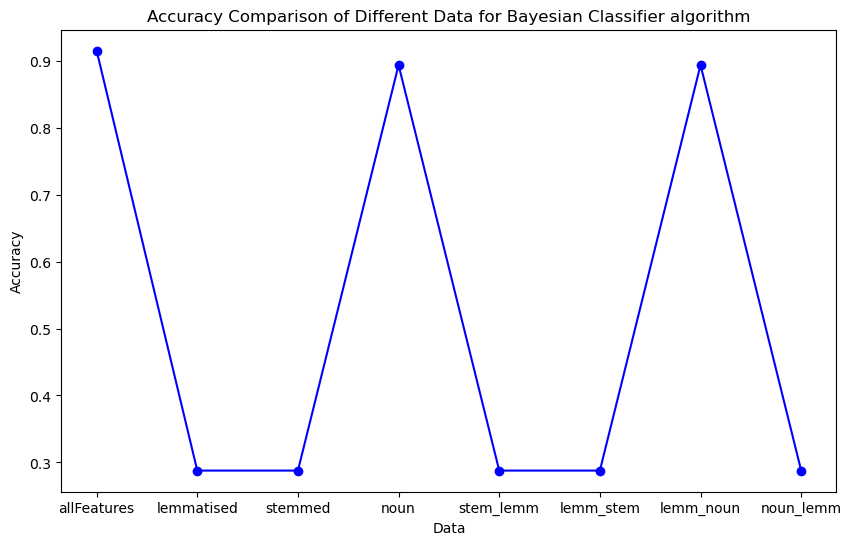

In [12]:
data = ['allFeatures', 'lemmatised', 'stemmed', 'noun', 'stem_lemm', 'lemm_stem', 'lemm_noun', 'noun_lemm']
accuracy = [accuracy_af, accuracy_lem, accuracy_stem, accuracy_noun, accuracy_stem_lemm, accuracy_lemm_stem, accuracy_lemm_noun, accuracy_noun_lemm]

fig = plt.figure(figsize=(10, 6))

plt.plot(data, accuracy, marker='o', color='blue', label='Accuracy')

plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Data for Bayesian Classifier algorithm')

plt.show()

[0.5095828172870361, 0.09015426597125943, 0.090140940233094, 0.47709494995781987, 0.09015426597125943, 0.090140940233094, 0.47709494995781987, 0.09015426597125943]


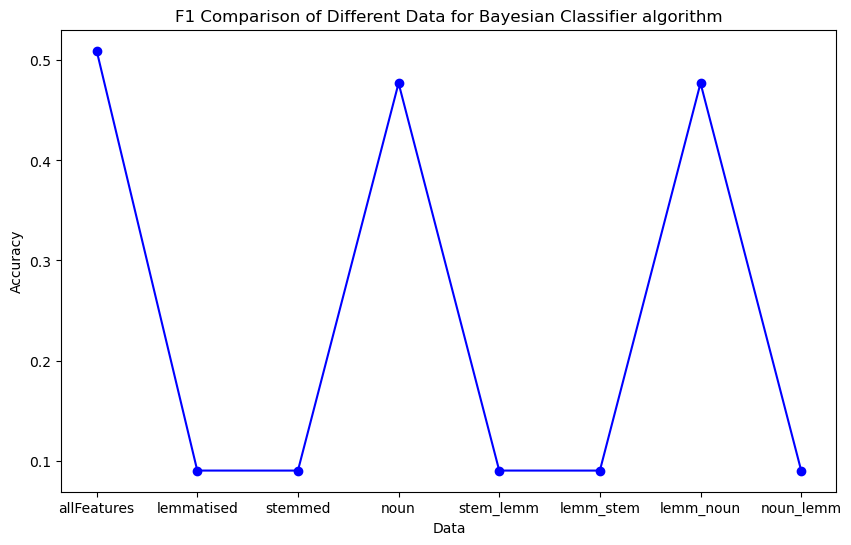

In [13]:
data = ['allFeatures', 'lemmatised', 'stemmed', 'noun', 'stem_lemm', 'lemm_stem', 'lemm_noun', 'noun_lemm']
accuracy = [f1_af, f1_lem, f1_stem, f1_noun, f1_stem_lemm, f1_lemm_stem, f1_lemm_noun, f1_noun_lemm]
print(accuracy)
fig = plt.figure(figsize=(10, 6))
plt.plot(data, accuracy, marker='o', color='blue', label='Accuracy')

plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.title('F1 Comparison of Different Data for Bayesian Classifier algorithm')

plt.show()

[2.189602851867676, 2.0259573459625244, 1.8421874046325684, 1.1429095268249512, 1.9792594909667969, 1.9740912914276123, 1.4129087924957275, 1.9056906700134277]


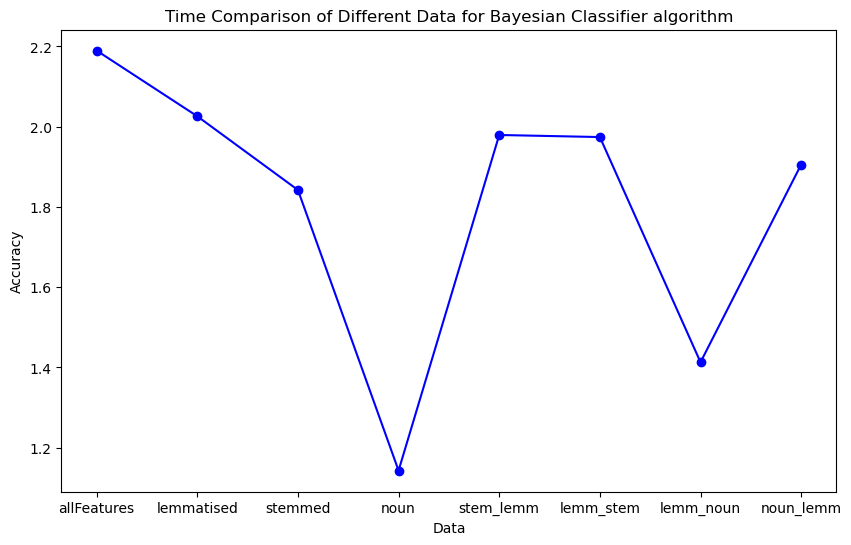

In [14]:
data = ['allFeatures', 'lemmatised', 'stemmed', 'noun', 'stem_lemm', 'lemm_stem', 'lemm_noun', 'noun_lemm']
accuracy = [time_af, time_lem, time_stem, time_noun, time_stem_lemm, time_lemm_stem, time_lemm_noun, time_noun_lemm]
print(accuracy)
fig = plt.figure(figsize=(10, 6))
plt.plot(data, accuracy, marker='o', color='blue', label='Accuracy')

plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.title('Time Comparison of Different Data for Bayesian Classifier algorithm')

plt.show()